In [140]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math


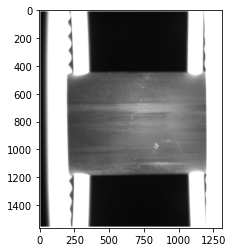

In [141]:
# img_test = cv.imread('datasets/normal/nodefect(50).bmp')
img_test = cv.imread('datasets/unnormal/defection(1).bmp')
img_test = cv.copyMakeBorder(img_test,10,10,10,10,
                       cv.BORDER_CONSTANT,value=[255, 255, 255])
plt.imshow(img_test)


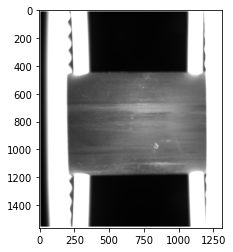

In [142]:
img_test_gray = cv.imread('datasets/unnormal/defection(1).bmp', cv.IMREAD_GRAYSCALE)
# img_test_gray = cv.imread('datasets/normal/nodefect(50).bmp', cv.IMREAD_GRAYSCALE)
img_test_gray = cv.copyMakeBorder(img_test_gray,10,10,10,10,
                       cv.BORDER_CONSTANT,value=[255, 255, 255])
plt.imshow(img_test_gray, cmap='gray')


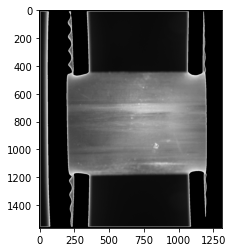

In [143]:
# copy for test
img_test_copy = img_test_gray.copy()

img_test_copy = cv.GaussianBlur(img_test_copy, (9, 9), 0)
_, img_test_copy = cv.threshold(img_test_copy, 220, 255, cv.THRESH_TOZERO_INV)
plt.imshow(img_test_copy, cmap='gray')


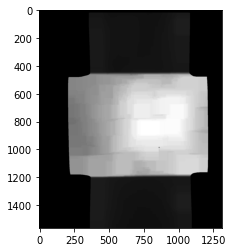

In [144]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (10, 10))
# kernel = np.ones((30, 30), np.uint8)
img_test_copy = cv.erode(img_test_copy, kernel, iterations=10)
img_test_copy = cv.dilate(img_test_copy, kernel, iterations=10)
plt.imshow(img_test_copy, cmap='gray')


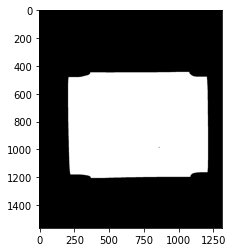

In [145]:
_, img_test_copy = cv.threshold(img_test_copy, 15, 255, cv.THRESH_BINARY)
plt.imshow(img_test_copy, cmap='gray')

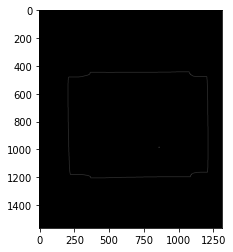

In [146]:
# after the erode we can now use canny method to find the edge
img_test_copy_canny = cv.Canny(img_test_copy, 0, 50, apertureSize=3 )
kernel = cv.getStructuringElement(cv.MORPH_RECT, (20, 20))
# img_test_copy = cv.erode(img_test_copy, kernel, iterations=10)
plt.imshow(img_test_copy_canny, cmap='gray')


In [147]:

(contours, _) = cv.findContours(img_test_copy, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
# print the number of contours
print('the count of contours is %d \n' % (len(contours)))


the count of contours is 2 



[[ 213 1206]
 [ 206  448]
 [1211  438]
 [1218 1196]]
[ 213 1206]
[206 448]
[1211  438]
[1218 1196]
206
1218
438
1206


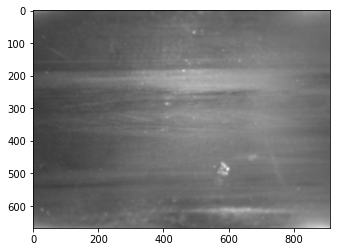

In [148]:
# c = sorted(contours, key=cv.contourArea, reverse=True)[0]

area = []
for i in range(len(contours)):
    area.append(cv.contourArea(contours[i]))
c = np.argmax(area)

rect = cv.minAreaRect(contours[c])
box = np.int0(cv.boxPoints(rect))

print(box)

left_top = box[0]
left_down = box[1]

right_down = box[2]
right_top = box[3]

print(left_top)
print(left_down)
print(right_down)
print(right_top)

min_left = np.min([left_top[0], left_down[0], right_top[0], right_down[0]])
min_right = np.max([left_top[0], left_down[0], right_top[0], right_down[0]])
min_down = np.min([left_top[1], left_down[1], right_top[1], right_down[1]])
min_top = np.max([left_top[1], left_down[1], right_top[1], right_down[1]])
print(min_left)
print(min_right)
print(min_down)
print(min_top)

new_img = img_test_gray[min_down+50:min_top-50, min_left+50:min_right-50]
new_img = cv.cvtColor(new_img, cv.COLOR_GRAY2BGR)
plt.imshow(new_img, cmap='gray')

# img_copy = img_test_gray.copy()
# draw_img = cv.drawContours(img_test.copy(), [box], -1, (0, 255, 0), 3)
#
#
# # img_copy = img_test_gray.copy()
# # cv.drawContours(img_copy, contours, -1, (120, 120, 120), 40)
# plt.imshow(draw_img, cmap='gray')


In [149]:
# print(tuple(box[0]))


In [150]:
# src_h, src_w = img_test.shape[:2]
# mask = np.full((src_h, src_w), 255, dtype=np.uint8)
#
# mask = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
#
# plt.imshow(mask, cmap='gray')


In [151]:
# triangle = np.array([[0, 0], [1500, 800], [500, 400]])
# pts = triangle.reshape((-1, 1, 2))
# print(pts)

# cv.fillConvexPoly(mask, box, (0, 0, 0))
# plt.imshow(mask, cmap='gray')


In [152]:
# mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)
#
# result_img = cv.add(img_test_gray.copy(), mask)
#
# plt.imshow(result_img, cmap='gray')


# # create mask
# src_h, src_w = img_test.shape[:2]
# mask = img_test.copy()
# for h in range(src_h):
#     for w in range(src_w):
#         result = cv.pointPolygonTest(c, (w, h), False)
#         if result < 0:
#             mask[h][w] = 255
#
#
# # cv.rectangle(mask, tuple(box[0]), tuple(box[-1]), (255, 0, 0), -1)
# plt.imshow(mask, cmap='gray')



